In [2]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import random

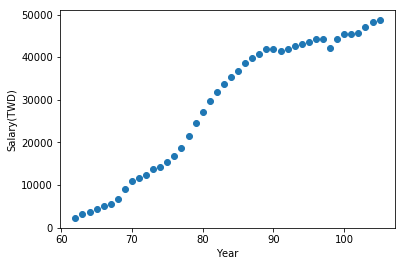

In [3]:
# define our dataset
data = np.genfromtxt('taiwan-salary.csv', delimiter=',')
years = data[:, 0] # x
salarys = data[:, 1] # y
m = salarys.size

# plot data
plt.scatter(years, salarys)
plt.xlabel("Year")
plt.ylabel("Salary(TWD)")
plt.show()

## Linear Regression with one variable
在這次的實驗當中，我們想要觀察的變量為「薪水」，輸入為年份

### 1. 定義成本函數
$$
h(x)=weight * x
$$
$$
J(W) = \frac{1}{2m}\sum_{i=1}^{m} (h(x) - y)^2
$$

### 2. 線性方程式
$$
h(x)=ax+b
$$

### 3. 梯度下降更新權重
$$
W = W - \alpha * \frac{1}{m} \sum_{i=1}^{m}(h(x) - y) * x
$$

In [4]:
# normalization
weights = 1
train_data = years
train_label = salarys
print(train_data, train_label)



[  62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  101.  102.  103.  104.  105.] [  2254.   3078.   3637.   4266.   5068.   5631.   6727.   9074.  10925.
  11682.  12313.  13689.  14265.  15412.  16799.  18707.  21535.  24586.
  27097.  29618.  31848.  33783.  35444.  36734.  38521.  39690.  40846.
  41856.  41927.  41490.  42023.  42636.  43116.  43448.  44342.  44309.
  42036.  44256.  45395.  45483.  45553.  47164.  48362.  48657.]


1
[  62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  101.  102.  103.  104.  105.]
422.08887771
[  62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  101.  102.  103.  104.  105.]
459.70923697
[  62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  101.  102.  103.  104.  105.]


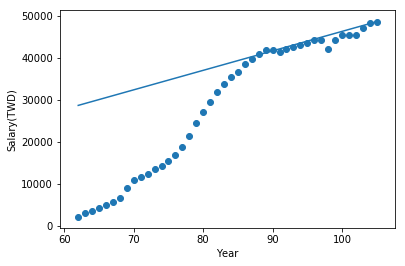

next year Salary in Taiwan would be: $49548.5183321
Salary in Taiwan at 150 would be: $69460.5397179


In [36]:
def predict(X, weight):
    return weight * X


def gradient(data, Y, alpha, step):
    m = len(data)
    weight = 1
    for i in range(0, step):
        sum = 0
        for j in range(0, m):
            prediction = weight * data[j]

            errors = prediction - Y[j]
            sum += errors * data[j]
        if (i % 100 == 0):
            print(weight)
            print(data)
        gradient = (1/m) * alpha * errors
        weight = weight - gradient

    return weight

w = gradient(train_data, train_label, 0.01, 300)
plt.plot(train_data, w * train_data)
plt.scatter(train_data, train_label)
plt.xlabel("Year")
plt.ylabel("Salary(TWD)")
plt.show()

print("next year Salary in Taiwan would be: " + "$" + str(w * 107))
print("Salary in Taiwan at 150 would be: " + "$" + str(w * 150))


## 問題：
1. 感覺訓練出來的結果還不夠接近資料的分佈，為什麼呢？
2. 這個 model 只有一個變數（年份），但年份不一定是影響薪水的主要因素，更重要的或許是物價指數、勞工工時等等，因此在分析資料時，知道如何選用哪些特徵是相當重要的。
3. 如果輸入的資料非線性的話怎麼辦？可以透過加入平方項的特徵解決。

1. 在這次的實驗當中，其實我忽略了$ax+b$當中的`b`，這就是造成本次的線條不夠準確的原因。在實務上會這樣表示：
$$
f(x)=w0x0+w1x1
$$
其中 x0 通常都會設定為 1 方便訓練，因此在設定權重時，別忘了把 x0 也一起算進去唷！